In [1]:
import os
import pickle
import time
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from analysis import *

%matplotlib inline

In [2]:
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet/'
eps_list = np.linspace(0, 5, 6)
eps_list_orderinf = np.linspace(0, 0.5, 6)

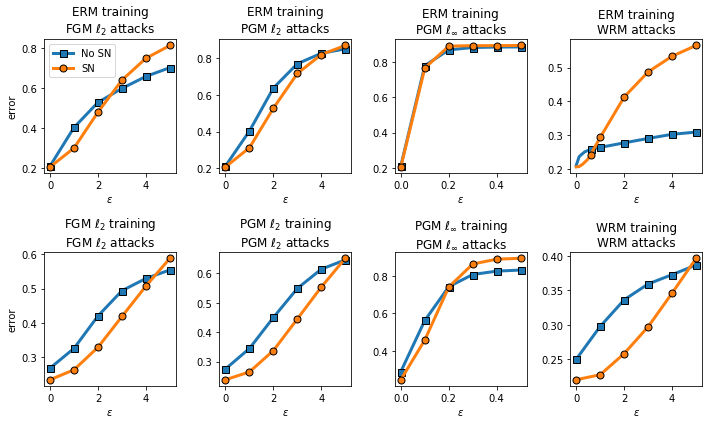

In [3]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 4, 1)
beta = 1.6
resultsfile = os.path.join(dirname, 'erm_defense_fgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list, title='ERM training\n'+r'FGM $\ell_2$ attacks')

plt.subplot(2, 4, 2)
beta = 1.6
resultsfile = os.path.join(dirname, 'erm_defense_pgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list, title='ERM training\n'+r'PGM $\ell_2$ attacks', legend=False)
plt.ylabel('')

plt.subplot(2, 4, 3)
beta = 1.6
resultsfile = os.path.join(dirname, 'erm_defense_pgm_attacks_testset_orderinf.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list_orderinf, title='ERM training\n'+r'PGM $\ell_\infty$ attacks', legend=False)
plt.ylabel('')

plt.subplot(2, 4, 4)
beta = 1.6
resultsfile = os.path.join(dirname, 'erm_defense_wrm_attacks_testset.pickle')
adv_results1 = pickle.load(file(resultsfile, 'rb'))
data1 = {'No SN': adv_results1[np.inf],
         'SN': adv_results1[beta]}
eps_list_small = eps_list/(25./3)
plot_adv_attack_curves(data1, eps_list_small, title='ERM training\nWRM attacks', marker=False, legend=False)
resultsfile = os.path.join(dirname, 'erm_defense_wrm_attacks_testset_beta%s.pickle'%(beta))
adv_results2 = pickle.load(file(resultsfile, 'rb'))
data2 = {'No SN': np.concatenate(([adv_results1[np.inf][-1]], adv_results2[np.inf][1:])),
         'SN': np.concatenate(([adv_results1[beta][-1]], adv_results2[beta][1:]))}
eps_list_extend = np.concatenate(([eps_list_small[-1]], eps_list[1:]))
plot_adv_attack_curves(data2, eps_list_extend, title='ERM training\nWRM attacks', legend=False)
plt.ylabel('')

plt.subplot(2, 4, 5)
beta = 1.6
resultsfile = os.path.join(dirname, 'fgm_defense_fgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list, title=r'FGM $\ell_2$ training'+'\n'+r'FGM $\ell_2$ attacks', legend=False)

plt.subplot(2, 4, 6)
beta = 1.6
resultsfile = os.path.join(dirname, 'pgm_defense_pgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list, title=r'PGM $\ell_2$ training'+'\n'+r'PGM $\ell_2$ attacks', legend=False)
plt.ylabel('')

plt.subplot(2, 4, 7)
beta = 1.6
dirname_orderinf = '/data/save_weights_tf1.10.1/cifar10/alexnet_norminfattacks_eps0.1/'
resultsfile = os.path.join(dirname_orderinf, 'pgm_defense_pgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list_orderinf, title=r'PGM $\ell_\infty$ training'+'\n'+r'PGM $\ell_\infty$ attacks', legend=False)
plt.ylabel('')

plt.subplot(2, 4, 8)
beta = 1.6
resultsfile = os.path.join(dirname, 'wrm_defense_wrm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}
plot_adv_attack_curves(data, eps_list, title='WRM training\nWRM attacks', legend=False)
plt.ylabel('')
plt.tight_layout()

plt.savefig('/data/Figures/cifar10_alexnet_advrobustnesscurves.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [4]:
beta = 1.6
dirname_orderinf = '/data/save_weights_tf1.10.1/cifar10/alexnet_norminfattacks_eps0.1/'
resultsfile = os.path.join(dirname_orderinf, 'pgm_defense_pgm_attacks_testset.pickle')
adv_results = pickle.load(file(resultsfile, 'rb'))
data = {'No SN': adv_results[np.inf], 'SN': adv_results[beta]}

print(data)

{'No SN': array([0.71      , 0.43789474, 0.25831579, 0.19347368, 0.17547368,
       0.16978947]), 'SN': array([0.75357895, 0.54157895, 0.26      , 0.13747368, 0.11189474,
       0.10705263])}
